In [1]:
import numpy as np
import cv2

In [3]:
cap = cv2.VideoCapture(0)  # 一般的筆 本電腦 有內置攝像頭。所以參數就是 0。你可以 設置成 1 或 者其他的來 擇別的攝像頭

'''
你可以使用函數 cap.get(propId) 來獲得 的一些參數信息。
propId 可以是 0 到 18 之 的任何整數。
其中的一些值可以使用 cap.set(propId,value) 來修改 value 就是 你想 置成的新值。
例如 我可以使用 cap.get(3) cv2.CAP_PROP_FRAME_WIDTH和 cap.get(4) cv2.CAP_PROP_FRAME_HEIGHT來查看每一幀的寬和高。
默認情況下得到的值是 640X480。但是我可以使用 ret=cap.set(3,320) 和 ret=cap.set(4,240) 來把寬和高改成 320X240。
'''
# ret=cap.set(3,320)
# ret=cap.set(4,240)

# ret = cap.set(cv2.CAP_PROP_FRAME_WIDTH, 480)#避免计算量过大
# ret = cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 270)#
#等比缩放
ret = cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)#高
ret = cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)



# while (True):
while cap.isOpened():  # 檢查是否成功初始化，否則就 使用函數 cap.open()
    # Capture frame-by-frame
    ret, frame = cap.read()  # ret 返回一個布爾值 True/False
    # print('frame shape:',frame.shape)#(720, 1280, 3)

    frame = cv2.flip(frame, flipCode=1)  # 左右翻轉,使用筆記本電腦攝像頭才有用。
    # flipCode：翻轉方向 ; 1：水平翻轉；0：垂直翻轉 ; -1：水平垂直翻轉

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, 1)

    # Display the resulting frame
    cv2.imshow('frame', gray)
    cv2.setWindowTitle('frame', 'COLOR_BGR2GRAY')

    # Property=cv2.getWindowProperty('frame',0)#無用

    # if cv2.waitKey(1) & 0xFF == ord('q'):#不行
    #     break
    key = cv2.waitKey(delay=10)
    if key == ord(" "):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [1]:
def nothing(x):
    pass


img = np.zeros((300, 512, 3), np.uint8)
cv2.namedWindow('image', cv2.WINDOW_NORMAL)

# create trackbars for color change
cv2.createTrackbar('R', 'image', 0, 255, nothing)
cv2.createTrackbar('G', 'image', 0, 255, nothing)
cv2.createTrackbar('B', 'image', 0, 255, nothing)

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image', 0, 1, nothing)
# 只有当 转换按钮 指向 ON 时 滑动条的滑动才有用，否则窗户 都是黑的。

while True:

    # get current positions of four trackbars
    r = cv2.getTrackbarPos('R', 'image')
    g = cv2.getTrackbarPos('G', 'image')
    b = cv2.getTrackbarPos('B', 'image')
    s = cv2.getTrackbarPos(switch, 'image')  # 另外一个重要应用就是用作转换按钮

    if s == 0:
        img[:] = 0
    else:
        img[:] = [b, g, r]

    cv2.imshow('image', img)
    k = cv2.waitKey(1)  # & 0xFF
    if k == ord("q"):
        break

cv2.destroyAllWindows()

NameError: name 'np' is not defined

在OpenCV 的 HSV 格式中,  
### H(色彩/色度)的取值範圍是 [0,179],  
### S(飽和度)的取值範圍 [0,255],  
### V(亮度)的取值範圍 [0,255]。  
但是不同的軟件使用的值可能不同。所以當你需要拿 OpenCV 的 HSV 值與其他軟件的 HSV 值進行對比時,一定記得得歸一化

In [2]:
'''
物体跟踪
• 从视频中获取每一帧图像
• 将图像转换到 HSV 空间
• 设置 HSV 阈值到蓝色范围。
• 获取蓝色物体 当然我们 可以做其他任何我们想做的事 
比如 在蓝色 物体周围画一个圈。
当你学习了【轮廓】之后 你就会学到更多 相关知识
那是你就可以找到物体的重心 并根据重心来跟踪物体
仅仅在摄像头前挥挥手就可以画出同的图形，或者其他更有趣的事。
'''

cap = cv2.VideoCapture(0)
ret = cap.set(3, 640)
ret = cap.set(4, 480)

# 定藍色的閾值
# lower = np.array([110, 50, 50])
# upper = np.array([130, 255, 255])

#黄色-乒乓球
#lower = np.array([20, 100, 100])
#upper = np.array([30, 255, 255])

# 黑色
lower = np.array([0, 0, 0])
upper = np.array([180, 255, 30])

while True:
    # 获取每一帧
    ret, frame = cap.read()
    # 换到 HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # 根据阈值构建掩模
    mask = cv2.inRange(hsv, lower, upper)
    # mask = cv2.inRange(hsv, lower_black, upper_black)
    # 对原图像和掩模位运算
    res = cv2.bitwise_and(frame, frame, mask=mask)

    # 显示图像
    frame = cv2.flip(frame, flipCode=1)
    cv2.imshow('frame', frame)
    cv2.moveWindow('frame', x=0, y=0)  # 原地
    cv2.imshow('mask', mask)
    cv2.moveWindow('mask', x=frame.shape[1], y=0)#右边
    #cv2.imshow('res', res)
    #cv2.moveWindow('res', y=frame.shape[0], x=0)#下边

    k = cv2.waitKey(1)  # & 0xFF
    if k == ord(' '):
        break
# 关闭窗口
cap.release()
cv2.destroyAllWindows()

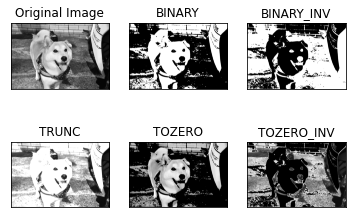

In [60]:
from matplotlib import pyplot as plt

img = cv2.imread('dog.jpg', 0)

ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i + 1), plt.imshow(images[i],"gray")
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

In [1]:
#找到輪廓
img = cv2.imread('test.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  
ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)  
  
contours, hierarchy = cv2.findContours(binary,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)  
cv2.drawContours(img,contours,-1,(80,120,30),3)  
  
cv2.imshow("img", img)  
cv2.waitKey(0) 
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

array([[[-1, -1,  1, -1],
        [ 5, -1,  2,  0],
        [-1, -1,  3,  1],
        [-1, -1,  4,  2],
        [-1, -1, -1,  3],
        [-1,  1,  6,  0],
        [-1, -1,  7,  5],
        [-1, -1,  8,  6],
        [-1, -1, -1,  7]]], dtype=int32)

In [15]:
# -*- coding: UTF-8 -*-


img = cv2.imread('sudoku.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
## 阈值分割
ret,thresh = cv2.threshold(gray,200,255,1)

## 对二值图像执行膨胀操作
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5, 5))     
dilated = cv2.dilate(thresh,kernel)

## 轮廓提取，cv2.RETR_TREE表示建立层级结构
contours, hierarchy = cv2.findContours(dilated,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

## 提取小方格，其父轮廓都为0号轮廓
boxes = []
for i in range(len(hierarchy[0])):
    if hierarchy[0][i][3] == 0:
        boxes.append(hierarchy[0][i])

## 提取数字，其父轮廓都存在子轮廓        
number_boxes = []
for j in range(len(boxes)):
    if boxes[j][2] != -1:
        #number_boxes.append(boxes[j])
        x,y,w,h = cv2.boundingRect(contours[boxes[j][2]])
        number_boxes.append([x,y,w,h])
        img = cv2.rectangle(img,(x-1,y-1),(x+w+1,y+h+1),(0,0,255),2)

cv2.namedWindow("img", cv2.WINDOW_NORMAL); 
cv2.imshow("img", img)
cv2.waitKey(0) 
cv2.destroyAllWindows()

In [18]:
hierarchy

array([[[ 4, -1,  1, -1],
        [-1, -1,  2,  0],
        [-1, -1,  3,  1],
        [-1, -1, -1,  2],
        [-1,  0,  5, -1],
        [-1, -1,  6,  4],
        [-1, -1,  7,  5],
        [-1, -1, -1,  6]]], dtype=int32)